In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Creating training Dataframe
train = pd.read_csv('titanic_train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


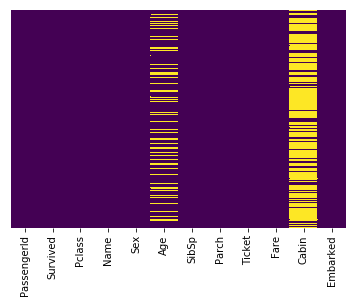

In [9]:
#Checking for null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So, we have some missing values for age and a lot of missing values for cabin.

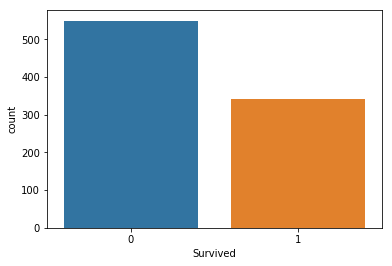

In [10]:
#countplot for people survived
sns.countplot(x='Survived',data=train)

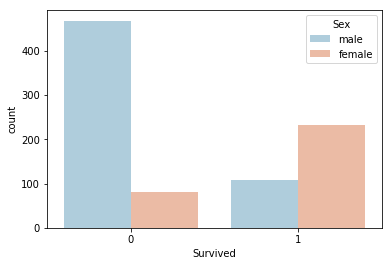

In [11]:
#countplot for no. of people survived on the basis of sex
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

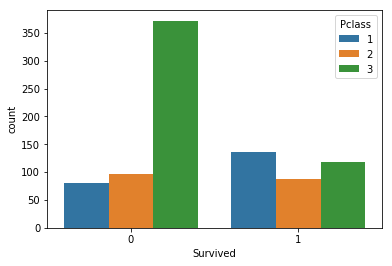

In [12]:
#countplot for no. of people survived on the basis of Passenger class
sns.countplot(x='Survived',data=train,hue='Pclass')

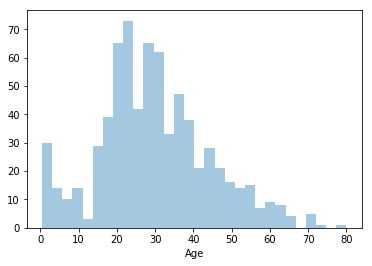

In [13]:
#Distribution plot of passengers on the basis of age
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


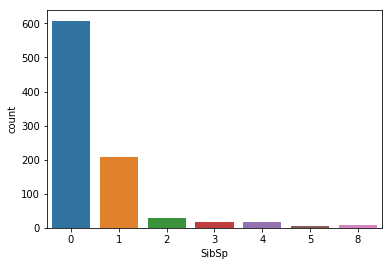

In [15]:
#Countplot of passenger with sbilings and spouses
sns.countplot(x='SibSp',data=train)

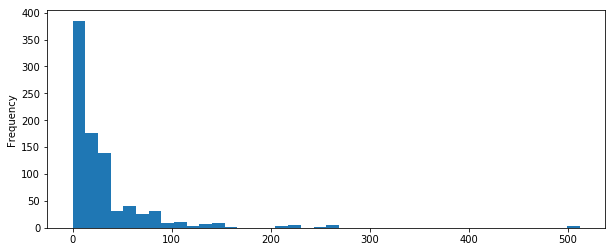

In [16]:
#Histogram of fare
train['Fare'].plot.hist(bins=40,figsize=(10,4))

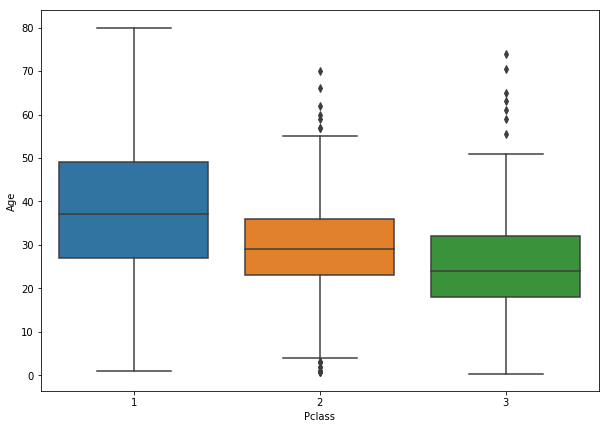

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

Now, we have to fill null values for age column with respect to PClass

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

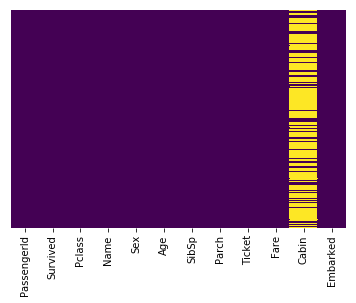

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
#Dropping cabin column
train.drop('Cabin',axis=1,inplace=True)

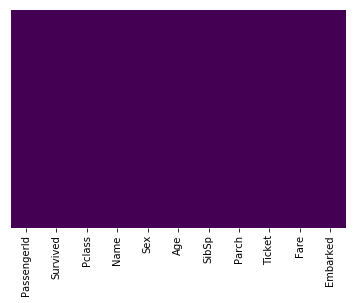

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
train.dropna(inplace=True)

In [33]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [35]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [36]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
train = pd.concat([train,sex,embark],axis=1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [41]:
#Dropping text columns
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
#Dropping passenger ID
train.drop(['PassengerId'],axis=1,inplace=True)

In [44]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Here, we are going to use train data as our whole dataset

In [45]:
#Splitting Predictor and target variable columns
y = train['Survived']
x = train.drop('Survived',axis=1)

In [46]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [47]:
# Performing train-test split
from sklearn.cross_validation import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [50]:
#Creating Logistic Regression object
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()

In [52]:
#Training Log Regression model
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
# Determining predictions
predictions = logmodel.predict(x_test)

In [54]:
#Creating Classification report
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [56]:
#Creating Confusion metrics
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]


In [58]:
Accuracy = (148+68)/(148+15+36+68)

In [59]:
Accuracy

0.8089887640449438